In [29]:
import neuralnet
from neuralnet import Neural_net
import tensorflow as tf
import importlib
importlib.reload(neuralnet)

<module 'neuralnet' from '/Users/michaelkosmider/personal_projects/personal_projects/neural_net/neuralnet.py'>

In [17]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [20]:
X_train = X_train.reshape((55000, 784)) 
X_valid = X_valid.reshape((5000, 784))
X_train = X_train/255
X_valid = X_valid/255

Epoch 1 . Accuracy: 0.2256
Epoch 2 . Accuracy: 0.3278
Epoch 3 . Accuracy: 0.401
Epoch 4 . Accuracy: 0.4506
Epoch 5 . Accuracy: 0.4828
Epoch 6 . Accuracy: 0.5106
Epoch 7 . Accuracy: 0.5314
Epoch 8 . Accuracy: 0.5438
Epoch 9 . Accuracy: 0.5584
Epoch 10 . Accuracy: 0.5704
Epoch 11 . Accuracy: 0.5818
Epoch 12 . Accuracy: 0.589
Epoch 13 . Accuracy: 0.5966
Epoch 14 . Accuracy: 0.6016
Epoch 15 . Accuracy: 0.6108
Epoch 16 . Accuracy: 0.6186
Epoch 17 . Accuracy: 0.6236
Epoch 18 . Accuracy: 0.6286
Epoch 19 . Accuracy: 0.632
Epoch 20 . Accuracy: 0.6376
Epoch 21 . Accuracy: 0.6424
Epoch 22 . Accuracy: 0.645
Epoch 23 . Accuracy: 0.6472
Epoch 24 . Accuracy: 0.6522
Epoch 25 . Accuracy: 0.6558
Epoch 26 . Accuracy: 0.6602
Epoch 27 . Accuracy: 0.664
Epoch 28 . Accuracy: 0.6668
Epoch 29 . Accuracy: 0.6676
Epoch 30 . Accuracy: 0.6702
Epoch 31 . Accuracy: 0.6722
Epoch 32 . Accuracy: 0.6744
Epoch 33 . Accuracy: 0.6762
Epoch 34 . Accuracy: 0.6776
Epoch 35 . Accuracy: 0.6808
Epoch 36 . Accuracy: 0.683
Epoch 3

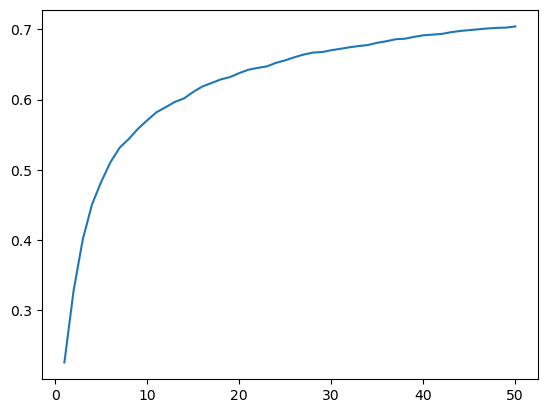

In [35]:
model = Neural_net(shape=[200,200], epochs=50, learning_rate=0.01)
model.fit(X_train, y_train, X_valid, y_valid)